# Credit Card Fraud Detection using Machine Learning

In this Jupyter notebook, we will explore credit card fraud detection using machine learning. Credit card fraud is a significant concern for financial institutions and cardholders alike. Detecting fraudulent transactions is essential to minimize financial losses and protect consumers.

We will employ various machine learning models, including Decision Trees, Random Forest, and XGBoost, to build a predictive system capable of identifying fraudulent credit card transactions. The dataset used in this analysis is sourced from Kaggle.

## Table of Contents

1. [Importing Libraries](#import-libraries)
2. [Import Data](#import-data)
3. [Data Imbalance Check](#data-imbalance-check)
4. [Data Cleaning](#data-cleaning)
5. [Data Preprocessing](#data-preprocessing)
6. [Model Building](#model-building)
7. [Comparison](#comparison)
8. [Conclusion](#conclusion)


Let's start by importing the necessary libraries and loading the dataset.



### Import Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

### Import Data

In [25]:
try:
    train_df = pd.read_csv('fraudTrain.csv')
    test_df = pd.read_csv('fraudTest.csv')
except:
    train_df = pd.read_csv('fraudTrain.csv')
    test_df = pd.read_csv('fraudTest.csv')

In [26]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Data imbalance check

In [27]:
fig = px.pie(values=train_df['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



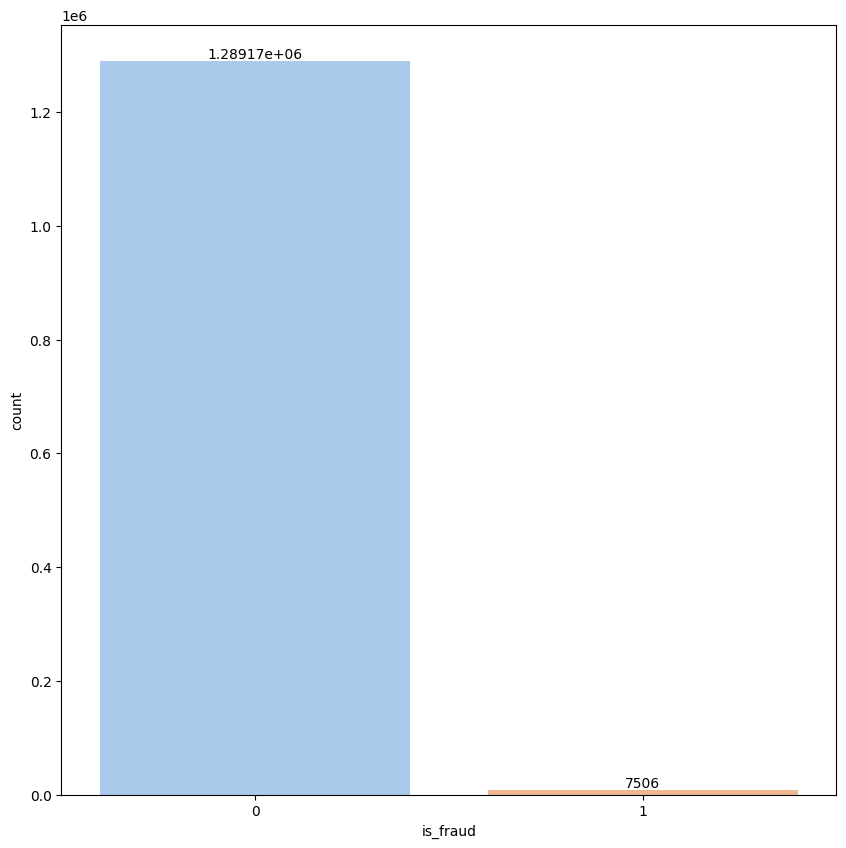

In [28]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='is_fraud',data=train_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [29]:
print('Genuine:', round(train_df['is_fraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds:', round(train_df['is_fraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In this dataset:

we have 99.42% of Genuine transactions and only 0,58% (7506) of fraud transactions; which means that a blind guess (bet on Genuine) would give us accuracy of 99.42%.

# Data cleaning

In [30]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [31]:
train_df.isnull().sum(),test_df.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

### 1. Drop Columns

In [32]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [33]:
print(train_df.shape)
print(test_df.shape)

(1296675, 14)
(555719, 14)


### 2. Handle Date time

In [34]:
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date']=train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_df['trans_date']=pd.to_datetime(train_df['trans_date'])
train_df['dob']=pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date']=test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_df['trans_date']=pd.to_datetime(test_df['trans_date'])
test_df['dob']=pd.to_datetime(test_df['dob'])

# Data Preprocessing

### 1. Feature Engineering

In [35]:
train_df["age"] = (train_df["trans_date"] - train_df["dob"]).dt.days // 365
test_df["age"] = (test_df["trans_date"] - test_df["dob"]).dt.days // 365


In [36]:
train_df['trans_month'] = pd.DatetimeIndex(train_df['trans_date']).month
train_df['trans_year'] = pd.DatetimeIndex(train_df['trans_date']).year

In [37]:
train_df['latitudinal_distance'] = abs(round(train_df['merch_lat']-train_df['lat'],3))
train_df['longitudinal_distance'] = abs(round(train_df['merch_long']-train_df['long'],3))

test_df['latitudinal_distance'] = abs(round(test_df['merch_lat']-test_df['lat'],3))
test_df['longitudinal_distance'] = abs(round(test_df['merch_long']-test_df['long'],3))

In [38]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [39]:
train_df.gender=train_df.gender.apply(lambda x: 1 if x=="M" else 0)
test_df.gender=test_df.gender.apply(lambda x: 1 if x=="M" else 0)

In [40]:
train_df = pd.get_dummies(train_df, columns=['category'], prefix='category')
test_df = pd.get_dummies(test_df, columns=['category'], prefix='category')

test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [41]:
train_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30,1,2019,0.068,0.870,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,40,1,2019,0.271,0.024,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,56,1,2019,0.970,0.108,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,52,1,2019,0.804,0.447,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,32,1,2019,0.254,0.830,False,...,False,False,False,False,False,True,False,False,False,False


In [42]:
test_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,0,0,0.020,0.265,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30,0,0,0.870,0.476,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49,0,0,0.177,0.660,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32,0,0,0.243,0.064,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,65,0,0,0.706,0.868,False,...,False,False,False,False,False,False,False,False,False,True


### 2. Split Train and Test Data

In [43]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

### 3. Handle Data Imbalance

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

### 4. Standardize data

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

### 1. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.40      0.72      0.52      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.86      0.76    555719
weighted avg       1.00      0.99      1.00    555719



### 2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.79      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.89      0.82    555719
weighted avg       1.00      1.00      1.00    555719



### 3. XGBoost

In [48]:
import xgboost as xgb


clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.84      0.22      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.91      0.61    555719
weighted avg       1.00      0.98      0.99    555719



# Comparison

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



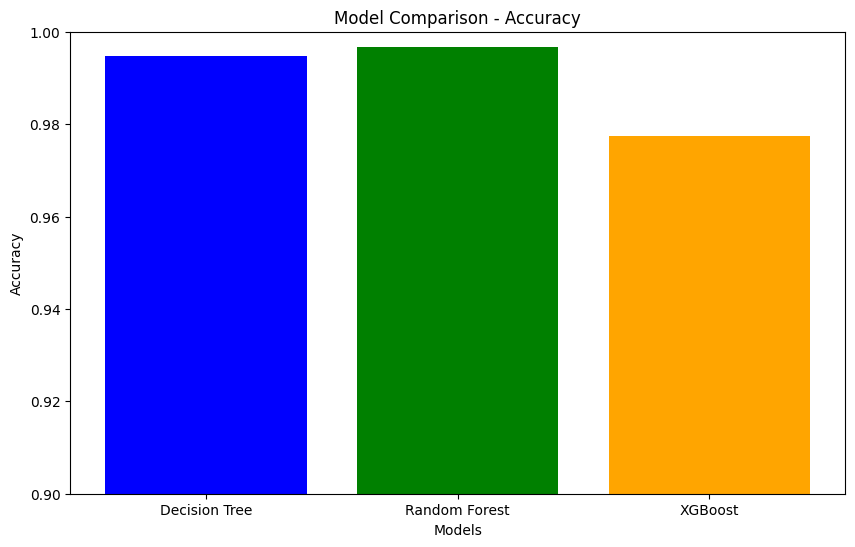

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)

xgb_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

accuracy_dt = report_dt['accuracy']
accuracy_rf = report_rf['accuracy']
accuracy_xgb = report_xgb['accuracy']

models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy_dt, accuracy_rf, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.9, 1.0)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()


# Conclusion

In conclusion, we have applied three different machine learning algorithms, namely Decision Tree, Random Forest, and XGBoost, to the task of credit card fraud detection. Each of these models has its strengths and limitations, and the results provide valuable insights into their performance.

**Decision Tree** achieved a high accuracy of approximately 99.48%. However, it exhibited a lower precision of about 40.35%, which means that it identified a significant number of false positives. Additionally, its recall, at 72.35%, suggests that it could have missed some fraudulent transactions. The F1 Score, a harmonic mean of precision and recall, was approximately 51.81%.

**Random Forest**, with an accuracy of around 99.66%, performed slightly better than the Decision Tree. It had a higher precision of approximately 54.48%, indicating a better ability to identify true positives. The recall rate of 79.16% suggests that it performed well in detecting fraudulent transactions. The F1 Score was approximately 64.54%, reflecting a good balance between precision and recall.

**XGBoost** achieved an accuracy of about 97.73%, which is slightly lower than the other two models. However, it exhibited a much lower precision of approximately 12.82%, meaning that it had a higher false positive rate. On the positive side, XGBoost showed a high recall of about 84.01%, indicating its effectiveness in capturing fraudulent transactions. Nevertheless, the F1 Score was relatively low at approximately 22.24%.

In this specific context, the choice of the most suitable model depends on the trade-off between precision and recall. A model with higher precision is preferred when the cost of false positives is significant, as it reduces the number of false alarms. On the other hand, a higher recall is desired when it's crucial to capture as many fraudulent transactions as possible.

Therefore, when making a decision about which model to deploy, one should consider the specific requirements of the application and the associated costs of false positives and false negatives. It's important to strike a balance that aligns with the organization's objectives and risk tolerance.

Overall, the Random Forest model appears to be a strong candidate for credit card fraud detection in this scenario, as it offers a good trade-off between precision and recall while maintaining a high level of accuracy. However, further fine-tuning and evaluation may be necessary to optimize the model's performance for real-world deployment.